# study hyperparams

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

## 5 votes per item

In [27]:
x = [1, 2, 3, 4] # gamma = [(1, 5), (1, 10), (1, 20), (1, 50)]
pr_plots = [95.7, 95.2, 98.1, 99.]
pr_flags = [77.1, 85.7, 91.8, 94.7]
pr_faces = [72.9, 77.7, 78.3, 79.5]
pr_food = [80., 82.1, 88.4, 95.9]

r_plots = [86.8, 81.2, 64., 34.7]
r_flags = [65.2, 61.5, 48.7, 18.1]
r_faces = [51.8, 43.4, 27.1, 8.3]
r_food = [57.1, 47.7, 31.5, 10.8]

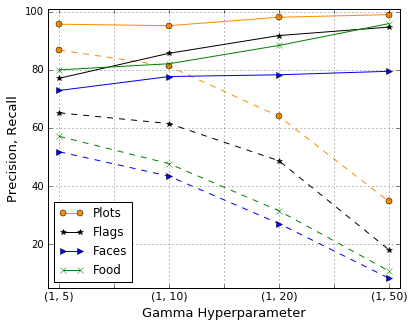

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.3,5))
ax.plot(x, pr_plots, label='Plots', color='darkorange', linestyle='-', marker='o')
ax.plot(x, r_plots, color='darkorange', linestyle='--', marker='o')

ax.plot(x, pr_flags, label='Flags', color='black', linestyle='-', marker='*')
ax.plot(x, r_flags, color='black', linestyle='--', marker='*')

ax.plot(x, pr_faces, label='Faces', color='blue', linestyle='-', marker='>')
ax.plot(x, r_faces, color='blue', linestyle='--', marker='>')

ax.plot(x, pr_food, label='Food', color='green', linestyle='-', marker='x')
ax.plot(x, r_food, color='green', linestyle='--', marker='x')


ax.legend( fontsize=12, loc=3)
ax.set_ylabel('Precision, Recall', fontsize=13)
ax.set_xlabel('Gamma Hyperparameter', fontsize=13)
ax.set_xlim((0.9, 4.1))
ax.set_ylim((5, 101))

a=ax.get_xticks().tolist()
a[1] = '(1, 5)'
a[2] = ''
a[3] = '(1, 10)'
a[4] = ''
a[5] = '(1, 20)'
a[6] = ''
a[7] = '(1, 50)'
ax.set_xticklabels(a,fontsize=11)
ax.grid()
# fig.savefig("gamma_hparams_5votes.pdf", bbox_inches='tight')

## All votes per item

In [29]:
x = [1, 2, 3, 4] # gamma = [(1, 5), (1, 10), (1, 20), (1, 50)]
pr_plots = [99, 99.8, 100, 100]
pr_flags = [92, 96.9, 96.5, 98]
pr_faces = [79.1, 81.9, 82.8, 89.1]
pr_food = [87, 96.8, 98.5, 99.9]

r_plots = [90.6, 86.5, 83.2, 70.1]
r_flags = [75.8, 74.1, 67.1, 55.3]
r_faces = [56.5, 49.6, 38.6, 19.1]
r_food = [49.3, 45.0, 40.2, 32.3]

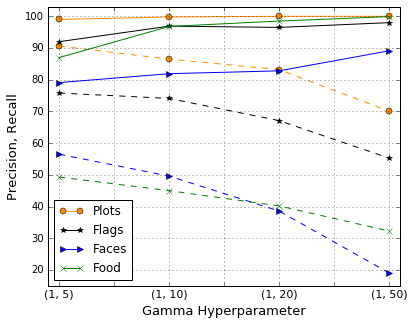

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.3,5))
ax.plot(x, pr_plots, label='Plots', color='darkorange', linestyle='-', marker='o')
ax.plot(x, r_plots, color='darkorange', linestyle='--', marker='o')

ax.plot(x, pr_flags, label='Flags', color='black', linestyle='-', marker='*')
ax.plot(x, r_flags, color='black', linestyle='--', marker='*')

ax.plot(x, pr_faces, label='Faces', color='blue', linestyle='-', marker='>')
ax.plot(x, r_faces, color='blue', linestyle='--', marker='>')

ax.plot(x, pr_food, label='Food', color='green', linestyle='-', marker='x')
ax.plot(x, r_food, color='green', linestyle='--', marker='x')


ax.legend( fontsize=12, loc=3)
ax.set_ylabel('Precision, Recall', fontsize=13)
ax.set_xlabel('Gamma Hyperparameter', fontsize=13)
ax.set_xlim((0.9, 4.1))
ax.set_ylim((15, 103))

a=ax.get_xticks().tolist()
a[1] = '(1, 5)'
a[2] = ''
a[3] = '(1, 10)'
a[4] = ''
a[5] = '(1, 20)'
a[6] = ''
a[7] = '(1, 50)'
ax.set_xticklabels(a,fontsize=11)
ax.grid()
# fig.savefig("gamma_hparams_Allvotes.pdf", bbox_inches='tight')

## Plot Accuract vs num of votes: FOOD

[ 3  5  7  9 12]


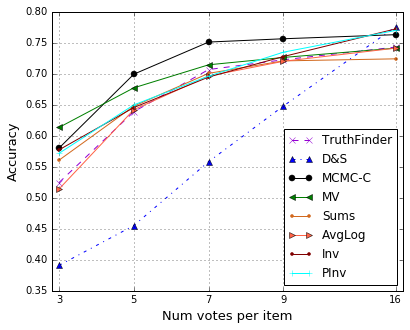

In [42]:
def plot_accu(file_name, title, ylim = None):
    df = pd.read_csv('{}'.format(file_name))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.3,5))    
    markers = ['x', '^', 'o', '<', '.', '>', '.', '+']
    algos = ['TruthFinder', 'D&S', 'MCMC-C', 'MV', 'Sums','AvgLog', 'Inv', 'PInv']
    x = df['votes_per_item'].unique()[:-1].astype(int)
    x = np.append(x, [x[-1]+3])
    print(x)
    for alg, c, l, m in zip(algos, ['darkviolet', 'b', 'black', 'green', 'chocolate', 'tomato', 'maroon', 'cyan'],
                            ['--', '-.', '-', '-', '-', '-', '-', '-'], markers):
        y = df.loc[(df['method'] == alg) ]['accuracy'].values
#         y_std = df.loc[(df['method'] == alg) ]['accuracy_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
#         ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('Num votes per item', size=13)
        
        ax.set_ylabel('Accuracy', size=13)
#         ax.set_title(title, size=15)
            
    ax.legend( fontsize=12, loc=4)
    ax.set_xlim(2.8,12.2 )
    ax.set_xticks(x)
    xticklabels = x.astype(str)
    xticklabels[-1] = "16"
    ax.set_xticklabels(xticklabels)
    ax.grid()
    if ylim:
        plt.ylim(ylim)
        
#     fig.savefig("food_agg_accuracy.pdf", bbox_inches='tight')

work_dir = '../../data/results/'
file = work_dir+'food_accuracy_votes_per_item.csv'
plot_accu(file, '')

## Plot Accuract vs num of votes: PLOTS

[ 3  5  7  9 11 13 16]


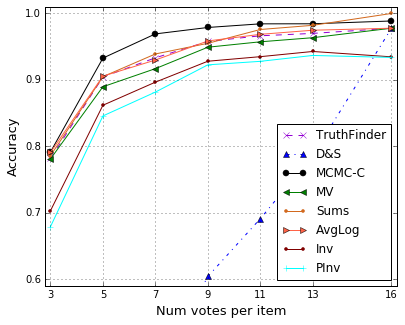

In [55]:
def plot_accu(file_name, title, ylim = None):
    df = pd.read_csv('{}'.format(file_name))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.3,5))    
    markers = ['x', '^', 'o', '<', '.', '>', '.', '+']
    algos = ['TruthFinder', 'D&S', 'MCMC-C', 'MV', 'Sums','AvgLog', 'Inv', 'PInv']
    x = df['votes_per_item'].unique()[:-1].astype(int)
    x = np.append(x, [x[-1]+3])
    print(x)
    for alg, c, l, m in zip(algos, ['darkviolet', 'b', 'black', 'green', 'chocolate', 'tomato', 'maroon', 'cyan'],
                            ['--', '-.', '-', '-', '-', '-', '-', '-'], markers):
        y = df.loc[(df['method'] == alg) ]['accuracy'].values
#         y_std = df.loc[(df['method'] == alg) ]['accuracy_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
#         ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('Num votes per item', size=13)
        
        ax.set_ylabel('Accuracy', size=13)
#         ax.set_title(title, size=15)
            
    ax.legend( fontsize=12, loc=4)
    ax.set_xlim(2.8,16.2 )
    ax.set_xticks(x)
    xticklabels = x.astype(str)
    xticklabels[-1] = "16"
    ax.set_xticklabels(xticklabels)
    ax.grid()
    if ylim:
        plt.ylim(ylim)
        
#     fig.savefig("plots_agg_accuracy.pdf", bbox_inches='tight')

work_dir = '../../data/results/'
file = work_dir+'plots_accuracy_votes_per_item.csv'
plot_accu(file, '', (0.59,1.01))